In [122]:
import fenics as fen
import mshr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
height = 5.0
width = 1.0
domain = mshr.Rectangle(fen.Point(0.0, 0.0), fen.Point(height, width))
mesh = mshr.generate_mesh(domain, 32)
V = fen.FunctionSpace(mesh, 'N1curl', 1)

In [124]:
def boundary_wall(x, on_boundary):
    tol = 1e-14
    return on_boundary and (fen.near(x[1], 0, tol) or fen.near(x[1], width, tol))
B_wall = fen.Constant((0, 0))
bc_wall = fen.DirichletBC(V, B_wall, boundary_wall)

In [125]:
def boundary_in(x, on_boundary):
    tol = 1e-14
    return on_boundary and fen.near(x[0], 0, tol)
B_in = fen.Constant((1, 1))
bc_in = fen.DirichletBC(V, B_in, boundary_in)

In [126]:
def boundary_out(x, on_boundary):
    tol = 1e-14
    return on_boundary and fen.near(x[0], height, tol)
B_out = fen.Constant((0, 0))
bc_out = fen.DirichletBC(V, B_out, boundary_out)

Calling FFC just-in-time (JIT) compiler, this may take some time.


array([ -2.62987839e-03,   0.00000000e+00,   1.78320823e-05, ...,
         1.13756645e+00,   1.13710808e+00,   1.13912739e+00])

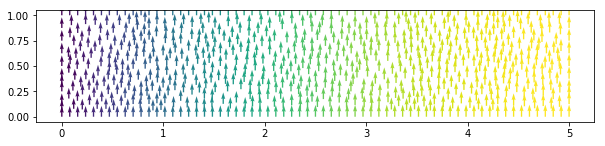

In [128]:
v = fen.TestFunction(V)
A = fen.TrialFunction(V)

dx = fen.Measure('dx', domain=mesh)

mu = 1.0 # 4*np.pi*1e-7
eps = 1.0 # 8.85418782e-12

a_stiff = (1/mu) * fen.dot(fen.curl(A), fen.curl(v))*dx
a_mass = eps * fen.dot(A, v)*dx
omega = 0.1
a = a_stiff - omega**2 * a_mass
j = fen.Constant((0, 0))
L = fen.dot(j, v)*dx

bc = [bc_wall, bc_in]#, bc_out]
#bc = fen.DirichletBC(V, fen.Expression(('0.0', '0.0'), degree=2), 'on_boundary')

A = fen.Function(V)
fen.solve(a == L, A, bc)
plt.figure(figsize=(10, 3))
#fen.plot(fen.curl(A))
fen.plot(A)
A.compute_vertex_values(mesh)